In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import cmapPy.pandasGEXpress as pandasGEXpress
import cmapPy.pandasGEXpress.parse as cparse
#import cmapPy.pandasGEXpress.parse

from cmapPy.pandasGEXpress.write_gct import write
from cmapPy.pandasGEXpress import gctx2gct
from cmapPy.pandasGEXpress import*

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
compound_df_5 = cparse.parse("/data3/balaji/cmap/level5_beta_trt_cp_n720216x12328.gctx")
compound_df_5 = compound_df_5.data_df
siginfo = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/siginfo_beta.txt", sep = '\t')

/tmp/ipykernel_7993/3693038783.py:3: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  siginfo = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/siginfo_beta.txt", sep = '\t')


In [ ]:
# would correlation be better here?

In [4]:
slice_compound_df_5 = compound_df_5.iloc[:,:1000]

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

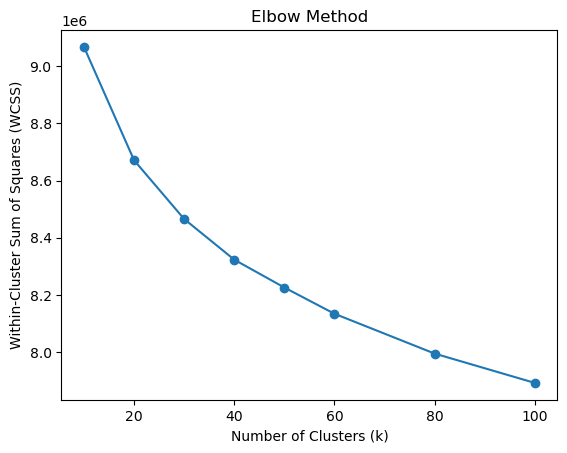

In [5]:
# Need to find optimal number of clusters

k_values = [10,20,30,40,50,60,80,100]

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(slice_compound_df_5)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [ ]:
# okay using 1000, need to do heatmap

In [ ]:
# just going to try 40 clusters

In [10]:
kmeans = KMeans(n_clusters = 40)
kmeans.fit(slice_compound_df_5.transpose()) # transpose for experiment

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=40)

In [11]:
kmeans.labels_

array([30, 30, 35, 17, 35, 17, 16,  0,  0, 17, 16, 16, 17, 18, 24, 16, 16,
       30, 11, 17, 19, 24, 11, 30, 17, 16, 24, 30, 30, 17, 18,  0,  0, 30,
        0, 17, 16, 24, 35, 30,  0, 17, 30, 17,  0, 16, 18,  0, 30,  3, 21,
        3, 21,  3, 18, 16, 24,  0,  0, 17, 35, 16, 35, 16, 35, 30, 16, 18,
       24, 16, 16, 18, 30, 16, 24, 30, 24, 18, 11, 24, 11, 30, 11, 18, 30,
       17, 24, 16, 17, 17,  0, 17,  0, 17, 16, 18, 16, 18, 35, 18, 30, 17,
       24, 18,  0, 16, 16, 30,  0,  3, 21,  3, 21,  3, 24, 16, 24, 30,  0,
       16, 35,  0, 39, 30, 39, 24, 16, 16, 16, 30, 18,  0, 17, 12, 18,  1,
       17, 18,  1, 39, 24, 39,  0, 30, 35,  1,  0,  0, 35,  0,  1,  1,  0,
        0, 16,  0, 16, 17,  0, 39, 18, 39, 18,  0, 17,  0, 18, 30,  1, 30,
       21, 39, 39, 30, 35, 39,  0,  0, 35,  1, 39, 18, 39,  0, 39, 30, 18,
       17, 17, 16, 18, 18, 16, 16, 17, 18, 16, 16, 35,  0, 19, 30, 11,  0,
       16, 17,  0, 30, 24, 16, 17, 16, 17, 16, 18, 16, 18,  0,  0,  0, 16,
       18, 16, 24,  0, 30

In [12]:
kmeans_labels_df = pd.DataFrame(kmeans.labels_)

In [13]:
kmeans_labels_df

,0
0,30
1,30
2,35
3,17
4,35
...,...
995,24
996,0
997,0
998,24


In [14]:
exp_rows_slice_compound_df = slice_compound_df_5.transpose()

In [16]:
exp_rows_slice_compound_df['cluster_group'] = kmeans_labels_df